# Complexity measure as peaks

In [1]:
from disassembly.simulate_proteolysis import enzyme_set, enzyme, amino_acids



kr = enzyme_set(
    [
        enzyme({"K":1}, "K protease"),
    ],
    [1],
    [1],
)


viat = enzyme_set(
    [
        enzyme({"V": 0.35, "I": 0.25, "A": 0.2, "T": 0.1}, "V+I+A+T protease"),
    ],
    [1],
    [1],
)

random = enzyme_set(
    [enzyme({aa: 1 / len(amino_acids) for aa in amino_acids.values()}, "random")],
    [1],
    [1],
)
protein = "MKAAVLTLAVLFLTGSQARHFWQQDEPPQSPWDRVKDLATVYVDVLKDSGRDYVSQFEGSALGKQLNLKLLDNWDSVTSTFSKLREQLGPVTQEFWDNLEKETEGLRQEMSKDLEEVKAKVQPYLDDFQKKWQEEMELYRQKVEPLRAELQEGARQKLHELQEKLSPLGEEMRDRARAHVDALRTHLAPYSDELRQRLAARLEALKENGGARLAEYHAKATEHLSTLSEKAKPALEDLRQGLLPVLESFKVSFLSALEEYTKKLNTQ"

In [2]:
from disassembly.benchmark import Benchmark

n_iterations = 10
bmrk = Benchmark()

enzyme_sets = [kr, viat, random]
enzyme_names = ["K", "V+I+A+T", "random"]

bmrk.simulate_degradation(
    protein,
    enzyme_sets=enzyme_sets,
    enzyme_names=enzyme_names,
    n_generate=100,
    endo_or_exo_probability=[0.9,0.1],
    iterations=n_iterations,
)

Running K, 0
 42 / 100 (48)

/Users/erikhartman/dev/disassembly/src/disassembly/simulate_proteolysis.py:227: RuntimeWarning: invalid value encountered in scalar divide
  p / sum(index_to_cut.values()) for p in index_to_cut.values()


 99 / 100 (112)
59 unique peptides. 104 total

 Averaged DI: 1.58
Running K, 1
 99 / 100 (112)
48 unique peptides. 103 total

 Averaged DI: 1.39
Running K, 2
 99 / 100 (112)
51 unique peptides. 103 total

 Averaged DI: 1.52
Running K, 3
 99 / 100 (110)
55 unique peptides. 103 total

 Averaged DI: 1.52
Running K, 4
 99 / 100 (120)
53 unique peptides. 103 total

 Averaged DI: 1.34
Running K, 5
 99 / 100 (106)
56 unique peptides. 103 total

 Averaged DI: 1.48
Running K, 6
 99 / 100 (106)
50 unique peptides. 103 total

 Averaged DI: 1.42
Running K, 7
 99 / 100 (111)
55 unique peptides. 103 total

 Averaged DI: 1.45
Running K, 8
 99 / 100 (118)
54 unique peptides. 103 total

 Averaged DI: 1.37
Running K, 9
 98 / 100 (111)
58 unique peptides. 103 total

 Averaged DI: 1.52
Running V+I+A+T, 0
 99 / 100 (112)
77 unique peptides. 103 total

 Averaged DI: 1.71
Running V+I+A+T, 1
 99 / 100 (109)
77 unique peptides. 103 total

 Averaged DI: 1.64
Running V+I+A+T, 2
 99 / 100 (109)
80 unique peptides

In [3]:
import numpy as np
from disassembly.util import KL

dct={"e":[], "i":[], "error":[] ,"kl":[],"d":[]}
for enzyme_name in bmrk.enzyme_names:

    for iteration in range(bmrk.iterations):

        spaces = np.zeros(len(protein))

        for sequence, copy_number in bmrk.simulated_peptidomes[enzyme_name][iteration].items():
            start = protein.find(sequence)
            end = start + len(sequence)
            spaces[start:end] += copy_number

        mean = np.mean(spaces)
        error = np.sum(np.abs(spaces-mean)**2)
        kl = KL(np.ones(len(protein))*mean, spaces)
        dct["e"].append(enzyme_name)
        dct["i"].append(iteration)
        dct["error"].append(error)
        dct["kl"].append(kl)
        dct["d"].append(bmrk.results["real"][enzyme_name][iteration]["d"])
dct

{'e': ['K',
  'K',
  'K',
  'K',
  'K',
  'K',
  'K',
  'K',
  'K',
  'K',
  'V+I+A+T',
  'V+I+A+T',
  'V+I+A+T',
  'V+I+A+T',
  'V+I+A+T',
  'V+I+A+T',
  'V+I+A+T',
  'V+I+A+T',
  'V+I+A+T',
  'V+I+A+T',
  'random',
  'random',
  'random',
  'random',
  'random',
  'random',
  'random',
  'random',
  'random',
  'random'],
 'i': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9],
 'error': [12648.164794007493,
  22073.685393258427,
  21556.157303370786,
  11446.9063670412,
  6438.25468164794,
  17587.063670411982,
  8375.67041198502,
  10175.333333333336,
  17157.662921348317,
  14408.25468164794,
  26548.674157303376,
  25460.59176029962,
  11050.299625468162,
  11566.0074906367,
  24202.1872659176,
  14149.865168539323,
  11110.786516853932,
  8074.516853932582,
  11004.816479400748,
  12349.602996254682,
  7064.749063670413,
  5283.760299625468,
  7082.681647940075,
  5714.516853932584

<Axes: xlabel='kl', ylabel='Density'>

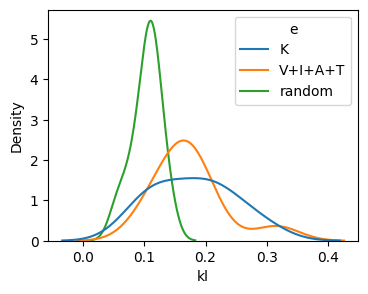

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dct_df = pd.DataFrame(dct)
plt.figure(figsize=(4,3))
sns.kdeplot(dct_df, x="kl", hue="e")

<Axes: xlabel='d', ylabel='Density'>

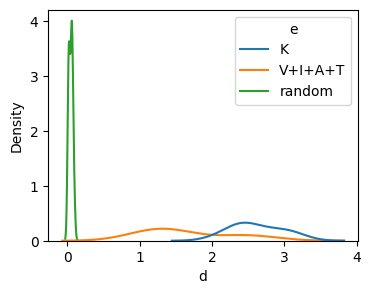

In [5]:
plt.figure(figsize=(4,3))
sns.kdeplot(dct_df, x="d", hue="e", bw_adjust=1)

<Axes: xlabel='d', ylabel='kl'>

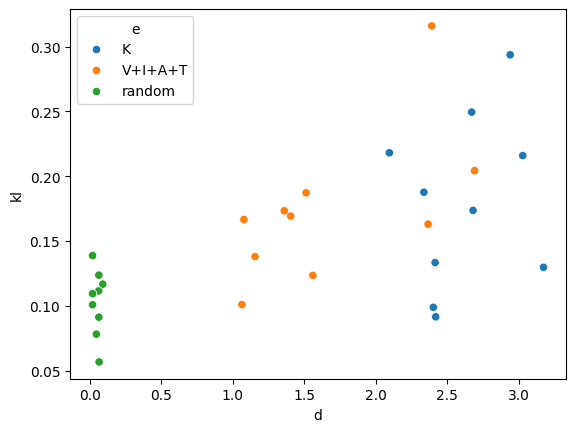

In [6]:
sns.scatterplot(dct_df, x="d",y="kl", hue="e")